# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-09-20 06:00:10.666912


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/19/20


,9/19/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,6764970,199259,2.95
Brazil,4528240,136532,3.02
India,5400619,86752,1.61
Mexico,694121,73258,10.55
United Kingdom,392845,41848,10.65
Italy,296569,35692,12.03
Peru,756412,31283,4.14


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 9/19/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
41863,US,6674411,2020-09-17,197633.0,870.0,44360.0,39758.714286
41862,US,6630051,2020-09-16,196763.0,982.0,37709.0,38548.428571
41861,US,6592342,2020-09-15,195781.0,1288.0,38690.0,37904.714286
41860,US,6553652,2020-09-14,194493.0,422.0,33530.0,36147.142857
41859,US,6520122,2020-09-13,194071.0,378.0,34999.0,34822.428571
41858,US,6485123,2020-09-12,193693.0,714.0,41471.0,34307.571429
41857,US,6443652,2020-09-11,192979.0,1213.0,47552.0,34733.428571


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/19/20


,9/19/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,449038,33081.0,7.37
New Jersey,199309,16064.0,8.06
Texas,707940,15051.0,2.13
California,783313,15018.0,1.92
Florida,681233,13287.0,1.95
Massachusetts,127181,9295.0,7.31
Illinois,275041,8672.0,3.15


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 9/19/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1449,California,775037,2020-09-17,14804.0,113.0,3716.0,3439.428571
1448,California,771321,2020-09-16,14691.0,97.0,3117.0,3433.000000
1447,California,768204,2020-09-15,14594.0,155.0,3070.0,3408.571429
1446,California,765134,2020-09-14,14439.0,61.0,3406.0,3452.714286
1445,California,761728,2020-09-13,14378.0,51.0,2795.0,3267.428571
1444,California,758933,2020-09-12,14327.0,97.0,4028.0,3374.142857
1443,California,754905,2020-09-11,14230.0,153.0,3944.0,3463.285714


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 9/19/20


,9/19/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,259817,6330.0,2.44
Riverside,56681,1153.0,2.03
Orange,51873,1127.0,2.17
San Bernardino,52287,908.0,1.74
San Diego,44293,796.0,1.80
San Joaquin,19793,414.0,2.09
Sacramento,21171,375.0,1.77


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 9/19/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
4595,Los Angeles,257271,2020-09-17,6324.0,21.0,1123.0,892.428571
4594,Los Angeles,256148,2020-09-16,6303.0,30.0,1099.0,898.428571
4593,Los Angeles,255049,2020-09-15,6273.0,42.0,393.0,829.714286
4592,Los Angeles,254656,2020-09-14,6231.0,23.0,671.0,833.571429
4591,Los Angeles,253985,2020-09-13,6208.0,11.0,809.0,807.285714
4590,Los Angeles,253176,2020-09-12,6197.0,26.0,1110.0,804.857143
4589,Los Angeles,252066,2020-09-11,6171.0,43.0,1042.0,808.428571
4588,Los Angeles,251024,2020-09-10,6128.0,38.0,1165.0,860.714286
4587,Los Angeles,249859,2020-09-09,6090.0,54.0,618.0,846.285714
4586,Los Angeles,249241,2020-09-08,6036.0,6.0,420.0,960.000000



7 day new US cases as of 9/19/20


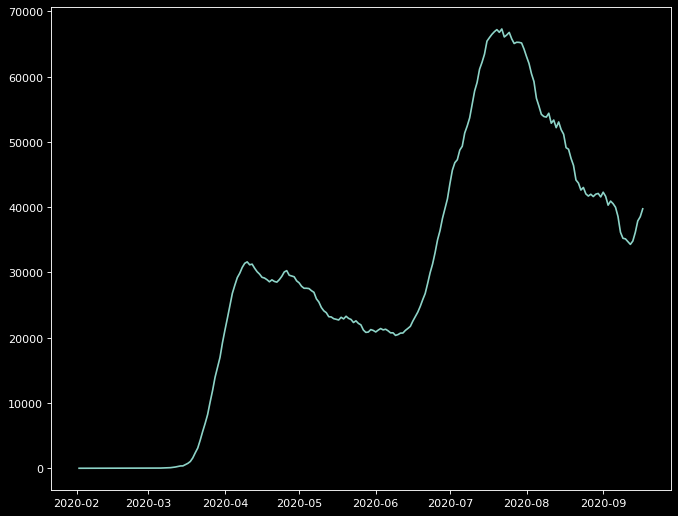

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 9/19/20


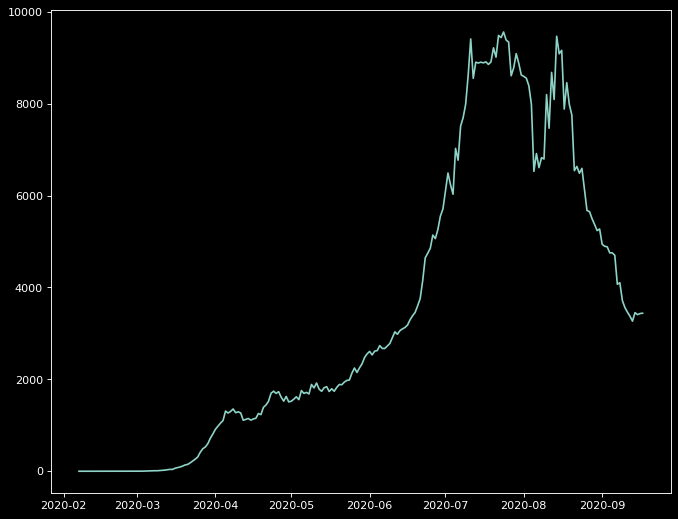

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 9/19/20


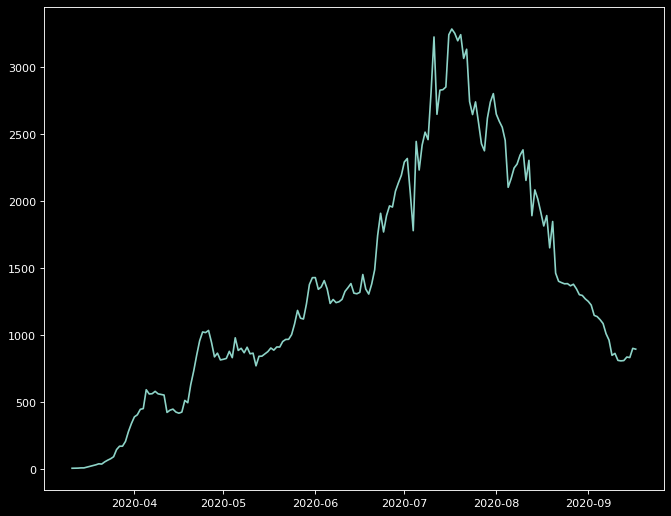

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()